In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
train_data = pd.read_csv('Titanic-Dataset.csv')

print("First 5 rows of the Titanic dataset:")
print(train_data.head())


print("\nDataset Information:")
print(train_data.info())

print("\nMissing Values:")
print(train_data.isnull().sum())


print("\nStatistical Summary:")
print(train_data.describe())

First 5 rows of the Titanic dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0          

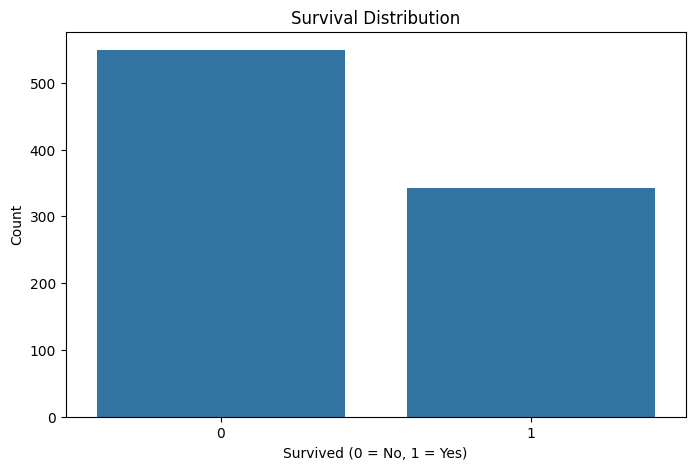

In [9]:
# Visualization of survival rate
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

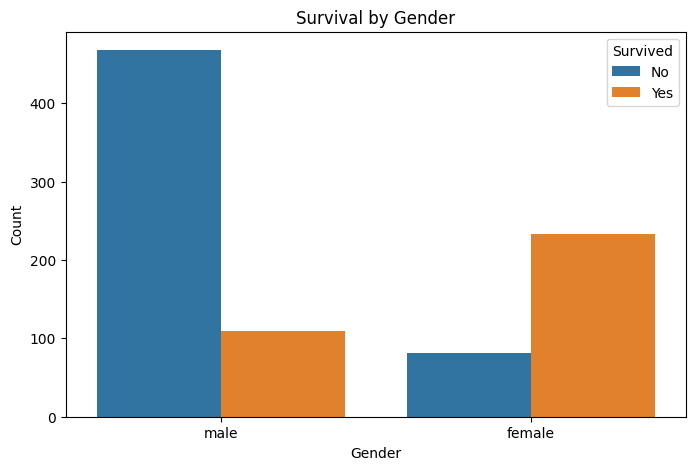

In [10]:
# Survival rate by sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

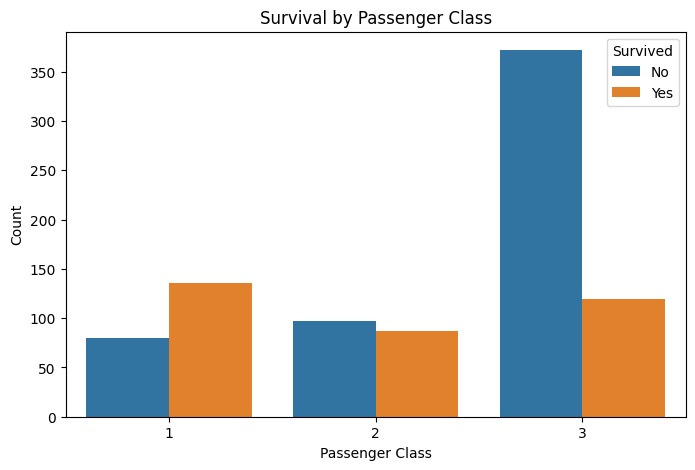

In [11]:
# Survival rate by passenger class
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

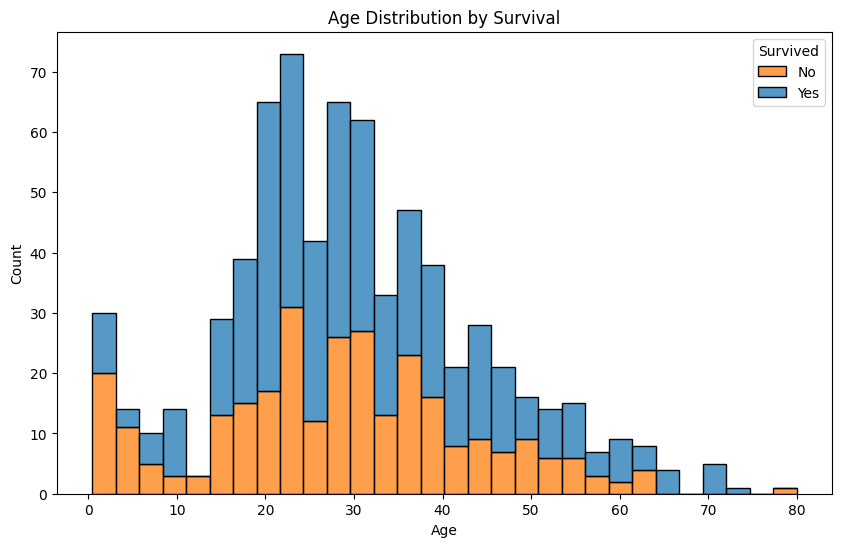

In [12]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

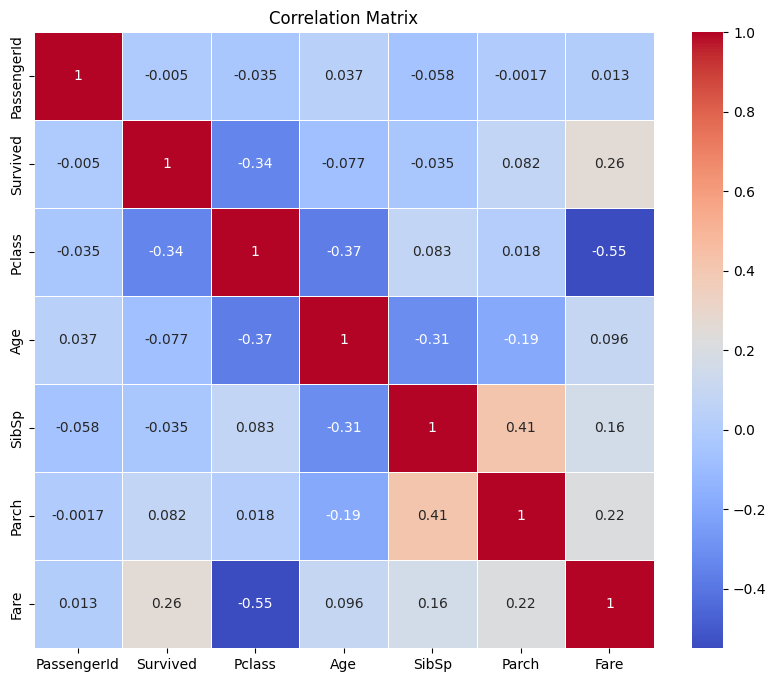

In [13]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation = train_data[numerical_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Create a copy of the data for preprocessing
df = train_data.copy()

In [15]:
# Handle missing values in Age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Handle missing values in Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column due to high number of missing values
df = df.drop(['Cabin'], axis=1)

In [16]:
# Create title feature from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df.loc[df['Title'].isin(rare_titles), 'Title'] = 'Rare'
df.loc[df['Title'] == 'Mlle', 'Title'] = 'Miss'
df.loc[df['Title'] == 'Ms', 'Title'] = 'Miss'
df.loc[df['Title'] == 'Mme', 'Title'] = 'Mrs'


In [17]:
# Create a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a feature for traveling alone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [18]:

# Drop unnecessary columns
df = df.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

# Convert categorical features to numerical
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Prepare data for modeling
X = df.drop('Survived', axis=1)
y = df['Survived']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8380

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



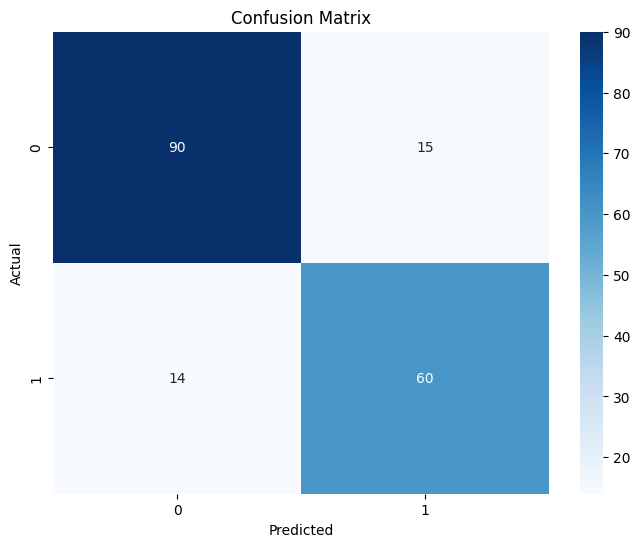

In [21]:
# Display confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Function to predict survival for new passengers
def predict_survival(passenger_data):
    """
    Predict survival for a new passenger
    
    Parameters:
    passenger_data: Dictionary with passenger information
    
    Returns:
    Survival prediction (0 = No, 1 = Yes)
    """
    # Process passenger data to match model features
    # This would need to be adapted based on the actual features used in your model
    
    # Make prediction
    prediction = model.predict([passenger_data])
    return prediction[0]

print("\nTitanic Survival Prediction Model Ready!")
print("You can now use this model to predict survival probability for new passengers.")


Titanic Survival Prediction Model Ready!
You can now use this model to predict survival probability for new passengers.
